In [50]:
import json
import numpy as np
import pandas as pd
import Bio.SeqIO as SeqIO
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt


## 1. Ebola - Human
### 1.1 Data Preprocessing

In [51]:
data_pos_1 = pd.read_csv("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Transfer_Learning/zhou/ebola/human/train_pos.csv")
data_pos_2 = pd.read_csv("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Transfer_Learning/zhou/ebola/human/test_pos.csv")

In [52]:
data_pos_2 = data_pos_2.rename(columns = {"EBOLA": "VIRUS","EBOLA_SEQ":"VIRUS_SEQ"})
data_pos_2

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,A8CG34,Q05322,MSPAAAAAGAGERRRPIASVRDGRGRGCGGPAGAALLGLSLVGLLL...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
1,O00264,Q05322,MAAEDVVATGADPSDLESGGLLHEIFTSPLNLLLLGLCIFLLYKIV...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
2,O15131,Q05322,MASPGKDNYRMKSYKNKALNPQEMRRRREEEGIQLRKQKREEQLFK...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
3,O15269,Q05322,MATATEQWVLVEMVQALYEAPAYHLILEGILILWIIRLLFSKTYKL...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
4,O43175,Q05322,MAFANLRKVLISDSLDPCCRKILQDGGLQVVEKQNLSKEELIAELQ...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
...,...,...,...,...
145,Q9UHD2,Q05127,MQSTSNHLWLLSDILGQGATANVFRGRHKKTGDLFAIKVFNNISFL...,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...
146,Q9UIG0,Q05127,MAPLLGRKPFPLVKPLPGEEPLFTIPHTQEAFRTREEYEARLERYS...,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...
147,Q9UNL2,Q05322,MAPKGSSKQQSEEDLLLQDFSRNLSAKSSALFFGNAFIVSAIPIWL...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
148,Q9Y4I1,Q05322,MAASELYTKFARVWIPDPEEVWKSAELLKDYKPGDKVLLLHLEEGK...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...


In [53]:
df = [data_pos_1,data_pos_2]
data_1 = pd.concat(df)
data_1

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,A0AV02,P06930,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...
1,A0FGR8,P03182,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...
2,A0FGR8,P0C739,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...
3,A0FGR8,P04544,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...
4,A0FGR8,Q77M19,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...
...,...,...,...,...
145,Q9UHD2,Q05127,MQSTSNHLWLLSDILGQGATANVFRGRHKKTGDLFAIKVFNNISFL...,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...
146,Q9UIG0,Q05127,MAPLLGRKPFPLVKPLPGEEPLFTIPHTQEAFRTREEYEARLERYS...,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...
147,Q9UNL2,Q05322,MAPKGSSKQQSEEDLLLQDFSRNLSAKSSALFFGNAFIVSAIPIWL...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
148,Q9Y4I1,Q05322,MAASELYTKFARVWIPDPEEVWKSAELLKDYKPGDKVLLLHLEEGK...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...


## 2. H1N1 - Human
### 2.1 Data Preprocessing

In [54]:
data_pos_1 = pd.read_csv("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Transfer_Learning/zhou/h1n1/human/train_pos.csv")
data_pos_2 = pd.read_csv("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Transfer_Learning/zhou/h1n1/human/test_pos.csv")

In [55]:
data_pos_2 = data_pos_2.rename(columns = {"H1N1": "VIRUS","H1N1_SEQ":"VIRUS_SEQ"})
data_pos_2

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,P51784,P03427,MAVAPRLFGGLCFRFRDQNPEVAVEGRLPISHSCVGCRRERTAMAT...,MERIKELRNLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...
1,O14503,P03428,MERIPSAQPPPACLPKAPGLEHGDLPGMYPAHMYQVYKSRRGIKRS...,MERIKELRNLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...
2,O14641,P03428,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,MERIKELRNLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...
3,O43889,P03428,MELELDAGDQDLLAFLLEESGDLGTAPDEAVRAPLDWALPLSEVPS...,MERIKELRNLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...
4,O75410,P03428,MAFSPWQILSPVQWAKWTWSAVRGGAAGEDEAGGPEGDPEEEDSQA...,MERIKELRNLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...
...,...,...,...,...
376,Q12800,P06821,MAWALKLPLADEVIESGLVQDFDASLSGIGQELGAGAYSMSDVLAL...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
377,Q8N448,P06821,MGTTSDEMVSVEQTSSSSLNPLCFECGQQHWTRENHLYNYQNEVDD...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
378,Q92997,P06821,MGETKIIYHLDGQETPYLVKLPLPAERVTLADFKGVLQRPSYKFFF...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
379,Q93062,P06821,MNNGGKAEKENTPSEANLQEEEVRTLFVSGLPLDIKPRELYLLFRP...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...


In [56]:
data_pos_1

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,Q08999,A0MPS7,MPSGGDQSPPPPPPPPAAAASDEEEEDDGEAEDAAPPAESPTPQIQ...,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...
1,P28749,A0MPS7,MFEDKPHAEGAAVVAAAGEALQALCQELNLDEGSAAEALDDFTAIR...,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...
2,P06400,A0MPS7,MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVR...,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...
3,Q15223,A1Z0Q5,MARMGLAGAAGRWWGLALGLTAFFLPGVHSQVVQVNDSMYGFIGTD...,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...
4,Q7Z434,A2T3M4,MPFAEDKTYKYICRNFSNFCNVDVVEILPYLPCLTARDQDRLRATC...,MATFKDACFHYRRLTALNRRLCNIGANSICMPVPDAKIKGWCLECC...
...,...,...,...,...
10853,O14654,Q9WPI5,MASCSFTRDQATRRLRGAAAAAAAALAAVVTTPLLSSGTPTALIGT...,IEEMSRDWFMLMPKQKVAGPLCVRMDQAIMDKNIILKANFSVIFDR...
10854,O00459,Q9WPI5,MAGPEGFQYRALYPFRRERPEDLELLPGDVLVVSRAALQALGVAEG...,IEEMSRDWFMLMPKQKVAGPLCVRMDQAIMDKNIILKANFSVIFDR...
10855,P06239,Q9YJQ8,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,MANEPQEHEEGKPFFPPLGDSGEEGPPNIPQDPTPGTPPGPINSKN...
10856,Q9Y572,U5TQE9,MSCVKLWPSGAPAPLVSIEELENQELVGKGGFGTVFRAQHRKWGYD...,MASRPAASSPVEARAPVGGQEAGGPSAATQGEAAGAPLAHGHHVYC...


In [57]:
df = [data_pos_1,data_pos_2]
data_2 = pd.concat(df)
data_2

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,Q08999,A0MPS7,MPSGGDQSPPPPPPPPAAAASDEEEEDDGEAEDAAPPAESPTPQIQ...,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...
1,P28749,A0MPS7,MFEDKPHAEGAAVVAAAGEALQALCQELNLDEGSAAEALDDFTAIR...,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...
2,P06400,A0MPS7,MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVR...,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...
3,Q15223,A1Z0Q5,MARMGLAGAAGRWWGLALGLTAFFLPGVHSQVVQVNDSMYGFIGTD...,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...
4,Q7Z434,A2T3M4,MPFAEDKTYKYICRNFSNFCNVDVVEILPYLPCLTARDQDRLRATC...,MATFKDACFHYRRLTALNRRLCNIGANSICMPVPDAKIKGWCLECC...
...,...,...,...,...
376,Q12800,P06821,MAWALKLPLADEVIESGLVQDFDASLSGIGQELGAGAYSMSDVLAL...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
377,Q8N448,P06821,MGTTSDEMVSVEQTSSSSLNPLCFECGQQHWTRENHLYNYQNEVDD...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
378,Q92997,P06821,MGETKIIYHLDGQETPYLVKLPLPAERVTLADFKGVLQRPSYKFFF...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
379,Q93062,P06821,MNNGGKAEKENTPSEANLQEEEVRTLFVSGLPLDIKPRELYLLFRP...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...


In [58]:
data = pd.concat([data_1,data_2])
data

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,A0AV02,P06930,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...
1,A0FGR8,P03182,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...
2,A0FGR8,P0C739,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...
3,A0FGR8,P04544,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...
4,A0FGR8,Q77M19,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...
...,...,...,...,...
376,Q12800,P06821,MAWALKLPLADEVIESGLVQDFDASLSGIGQELGAGAYSMSDVLAL...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
377,Q8N448,P06821,MGTTSDEMVSVEQTSSSSLNPLCFECGQQHWTRENHLYNYQNEVDD...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
378,Q92997,P06821,MGETKIIYHLDGQETPYLVKLPLPAERVTLADFKGVLQRPSYKFFF...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...
379,Q93062,P06821,MNNGGKAEKENTPSEANLQEEEVRTLFVSGLPLDIKPRELYLLFRP...,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...


In [59]:
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
li = []
for index,row in data.iterrows():
    if len(row['HUMAN_SEQ']) <= 1024 and len(row['VIRUS_SEQ']) <= 1024:
        li.append(1)
    else:
        li.append(0)
data['keep'] = li
data = data[data.keep == 1]
data = data[['HUMAN','VIRUS','HUMAN_SEQ','VIRUS_SEQ']]
data

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,A0AV02,P06930,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...
1,A0FGR8,P03182,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...
2,A0FGR8,P0C739,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...
3,A0FGR8,P04544,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...
4,A0FGR8,Q77M19,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...
...,...,...,...,...
11486,Q9UHD2,Q05127,MQSTSNHLWLLSDILGQGATANVFRGRHKKTGDLFAIKVFNNISFL...,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...
11488,Q9UNL2,Q05322,MAPKGSSKQQSEEDLLLQDFSRNLSAKSSALFFGNAFIVSAIPIWL...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
11490,Q9Y5M8,Q05322,MASADSRRVADGGGAGGTFQPYLDTLRQELQQTDPTLLSVVVAVLA...,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...
11491,Q06787,P03466,MEELVVEVRGSNGAFYKAFVKDVHEDSITVAFENNWQPDRQIPFHD...,MASQGTKRSYEQMETDGERQNATEIRASVGKMIGGIGRFYIQMCTE...


## 3. VIRUS - Human ( Nature method: Yang et. al)
### 3.1 Data Preprocessing

In [60]:
f = open('/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Transfer_Learning/yang/train.json')
f_2 = open('/home/anwer/Desktop/PPI_prediction/Dataset_ppi/Transfer_Learning/yang/test.json')
# data_3  = json.load(f)

In [25]:
data_3 = pd.read_json(f)
data_3_1 = pd.read_json(f_2)

In [26]:
data_3 = data_3[data_3.is_interaction == 1]
data_3_1 = data_3_1[data_3_1.is_interaction == 1]

In [28]:
df = [data_3,data_3_1]
data_3 = pd.concat(df)
# data_3.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
data_3

,protein_1,protein_2,is_interaction
40,"{'id': 'P06427', 'primary': 'MFQDTEEKPRTLHDLCQ...","{'id': 'Q14696', 'primary': 'MAASRWARKAVVLLCAS...",1
51,"{'id': 'P16749', 'primary': 'MELHSRGRHDAPSLSSL...","{'id': 'P60842', 'primary': 'MSASQDSRSRDNGPDGM...",1
62,"{'id': 'O36551', 'primary': 'MSSTQIRTEIPVALLIL...","{'id': 'Q8IWV8', 'primary': 'MASELEPEVQAIDRSLL...",1
94,"{'id': 'P06932', 'primary': 'MIGKEVTVQDIILELSE...","{'id': 'Q9NQY0', 'primary': 'MSWIPFKIGQPKKQIVP...",1
98,"{'id': 'P03410', 'primary': 'MAHFPGFGQSLLYGYPV...","{'id': 'Q96MT8', 'primary': 'MEALLEGIQNRGHGGGF...",1
...,...,...,...
49744,"{'id': 'P17473', 'primary': 'MASQRSDFAPDLYDFIE...","{'id': 'Q00403', 'primary': 'MASTSRLDALPRVTCPN...",1
49750,"{'id': 'A0A077CWY6', 'primary': 'MSTNPKPQRKTKR...","{'id': 'P06748', 'primary': 'MEDSMDMDMSPLRPQNY...",1
49772,"{'id': 'P06931', 'primary': 'MDLKPFARTNPFSGLDC...","{'id': 'P23142', 'primary': 'MERAAPSRRVPLPLLLL...",1
49774,"{'id': 'P0CK48', 'primary': 'MAPVTPDAVNARQQRPA...","{'id': 'P09543', 'primary': 'MNRGFSRKSHTFLPKIF...",1


In [29]:
HUMAN = []
VIRUS = []
HUMAN_SEQ = []
VIRUS_SEQ = []
for index,row in data_3.iterrows():
    HUMAN.append(row.protein_1['id'])
    HUMAN_SEQ.append(row.protein_1['primary'])
    VIRUS.append(row.protein_2['id'])
    VIRUS_SEQ.append(row.protein_2['primary'])
    
   

In [38]:
data_3 = pd.DataFrame(list(zip(HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ)), columns = ['HUMAN','VIRUS','HUMAN_SEQ','VIRUS_SEQ'])

In [39]:
data_3

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,P06427,Q14696,MFQDTEEKPRTLHDLCQALETTIHNIELQCVECKKPLQRSEVYDFA...,MAASRWARKAVVLLCASDLLLLLLLLPPPGSCAAEGSPGTPDESTP...
1,P16749,P60842,MELHSRGRHDAPSLSSLSERERRARRARRFCLDYEPVPRKFRRERS...,MSASQDSRSRDNGPDGMEPEGVIESNWNEIVDSFDDMNLSESLLRG...
2,O36551,Q8IWV8,MSSTQIRTEIPVALLILCLCLVACHANCPTYRSHLGFWQEGWSGQV...,MASELEPEVQAIDRSLLECSAEEIAGKWLQATDLTREVYQHLAHYV...
3,P06932,Q9NQY0,MIGKEVTVQDIILELSEVQPEVLPVDLFCEEELPNEQETEEEPDNE...,MSWIPFKIGQPKKQIVPKTVERDFEREYGKLQQLEEQTRRLQKDMK...
4,P03410,Q96MT8,MAHFPGFGQSLLYGYPVYVFGDCVQADWCPVSGGLCSTRLHRHALL...,MEALLEGIQNRGHGGGFLTSCEAELQELMKQIDIMVAHKKSEWEGR...
...,...,...,...,...
27181,P17473,Q00403,MASQRSDFAPDLYDFIESNDFGEDPLIRAASAAEEGFTQPAAPDLL...,MASTSRLDALPRVTCPNHPDAILVEDYRAGDMICPECGLVVGDRVI...
27182,A0A077CWY6,P06748,MSTNPKPQRKTKRNTNRRPQDVKFPGGGQIVGGVYLLPRRGPRLGV...,MEDSMDMDMSPLRPQNYLFGCELKADKDYHFKVDNDENEHQLSLRT...
27183,P06931,P23142,MDLKPFARTNPFSGLDCLWCREPLTEVDAFRCMVKDFHVVIREGCR...,MERAAPSRRVPLPLLLLGGLALLAAGVDADVLLEACCADGHRMATH...
27184,P0CK48,P09543,MAPVTPDAVNARQQRPADPALRRLMHPHHRNYTASKASAHSVKSVS...,MNRGFSRKSHTFLPKIFFRKMSSSGAKDKPELQFPFLQDEDTVATL...


In [42]:
df = [data,data_3]
data  = pd.concat(df)
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
li = []
for index,row in data.iterrows():
    if len(row['HUMAN_SEQ']) <= 1024 and len(row['VIRUS_SEQ']) <= 1024:
        li.append(1)
    else:
        li.append(0)
data['keep'] = li
data = data[data.keep == 1]
data = data[['HUMAN','VIRUS','HUMAN_SEQ','VIRUS_SEQ']]
data

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,A0AV02,P06930,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...
1,A0FGR8,P03182,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...
2,A0FGR8,P0C739,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...
3,A0FGR8,P04544,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...
4,A0FGR8,Q77M19,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...
...,...,...,...,...
30679,B8ZX42,Q9UNE7,MDLVLNRKEREALCKLLEIAPNCYGNIPLMKAAFKRSCLKHHPDKG...,MKGKEEKEGGARLGAGGGSPEKSPSAQELKEQGNRLFVGRKYPEAA...
30681,A0A077CWY6,P06748,MSTNPKPQRKTKRNTNRRPQDVKFPGGGQIVGGVYLLPRRGPRLGV...,MEDSMDMDMSPLRPQNYLFGCELKADKDYHFKVDNDENEHQLSLRT...
30682,P06931,P23142,MDLKPFARTNPFSGLDCLWCREPLTEVDAFRCMVKDFHVVIREGCR...,MERAAPSRRVPLPLLLLGGLALLAAGVDADVLLEACCADGHRMATH...
30683,P0CK48,P09543,MAPVTPDAVNARQQRPADPALRRLMHPHHRNYTASKASAHSVKSVS...,MNRGFSRKSHTFLPKIFFRKMSSSGAKDKPELQFPFLQDEDTVATL...


In [43]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files_new_ppi/transfer_learning_zhou_with_sequences.csv",index = False)

# 4. Exploratory Data Analysis

In [44]:
data= pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files_new_ppi/transfer_learning_zhou_with_sequences.csv")
data

,HUMAN,VIRUS,HUMAN_SEQ,VIRUS_SEQ
0,A0AV02,P06930,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...
1,A0FGR8,P03182,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...
2,A0FGR8,P0C739,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...
3,A0FGR8,P04544,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...
4,A0FGR8,Q77M19,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...
...,...,...,...,...
24317,B8ZX42,Q9UNE7,MDLVLNRKEREALCKLLEIAPNCYGNIPLMKAAFKRSCLKHHPDKG...,MKGKEEKEGGARLGAGGGSPEKSPSAQELKEQGNRLFVGRKYPEAA...
24318,A0A077CWY6,P06748,MSTNPKPQRKTKRNTNRRPQDVKFPGGGQIVGGVYLLPRRGPRLGV...,MEDSMDMDMSPLRPQNYLFGCELKADKDYHFKVDNDENEHQLSLRT...
24319,P06931,P23142,MDLKPFARTNPFSGLDCLWCREPLTEVDAFRCMVKDFHVVIREGCR...,MERAAPSRRVPLPLLLLGGLALLAAGVDADVLLEACCADGHRMATH...
24320,P0CK48,P09543,MAPVTPDAVNARQQRPADPALRRLMHPHHRNYTASKASAHSVKSVS...,MNRGFSRKSHTFLPKIFFRKMSSSGAKDKPELQFPFLQDEDTVATL...


In [45]:
# print("Maximum length proteins: ", max(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Maximum length of Proteins sequences: ", len(max(set(data['HUMAN_SEQ']).union(set(data['VIRUS_SEQ'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data['HUMAN_SEQ']).union(set(data['VIRUS_SEQ'])),key=len)))



Maximum length of Proteins sequences:  1024


Minimum length of Proteins sequences:  44


In [46]:
print("Number of unique Proteins: ", len(set(data['HUMAN']).union(set(data['VIRUS']))) )

Number of unique Proteins:  5619


In [47]:

col_list_protein_A = data['HUMAN'].values.tolist()
col_list_protein_B = data['VIRUS'].values.tolist()
count_col_A = Counter(col_list_protein_A)
count_col_B = Counter(col_list_protein_B)
count = count_col_A | count_col_B
count = dict(sorted(count.items(), key=lambda item: item[1],reverse = True))


<Figure size 1440x1440 with 0 Axes>

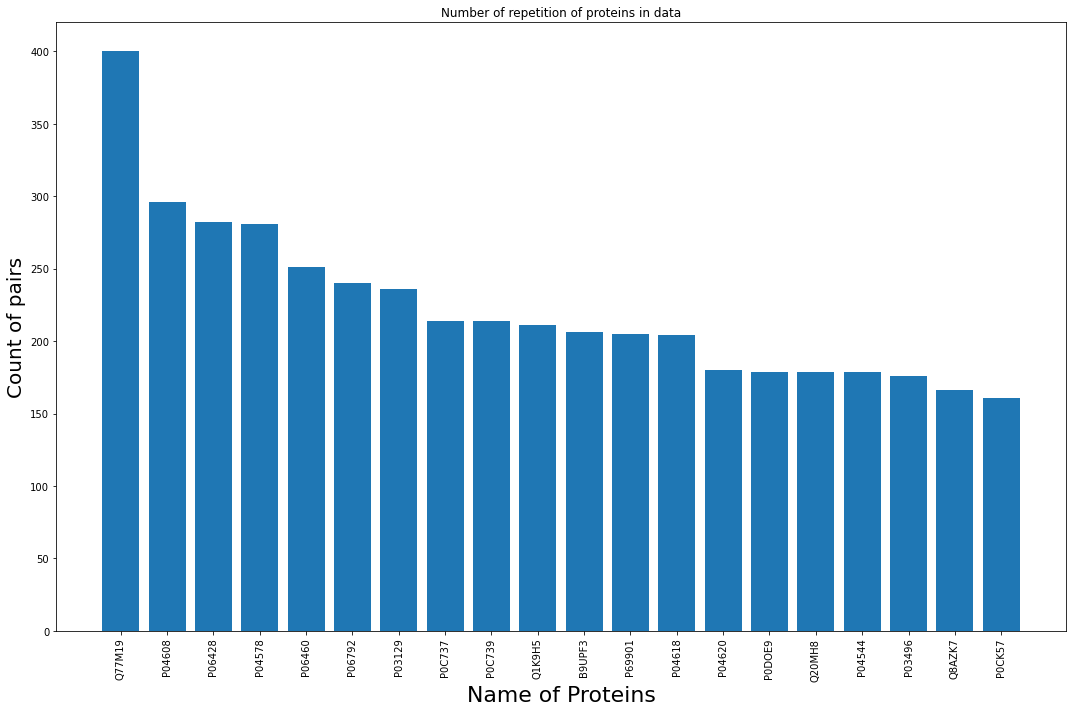

In [48]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

### Summary of EDA
1. Published in paper:  Zhou et al and transfr learning for predicting
2. Number of unique pairs: 24322
3. Number of proteins: 5619
4. Max length of sequences: 1024
5. Min lenght of sequences: 44
5. Top 5 redundant proteins: 


     'Q77M19': 400,
     'P04608': 296,
     'P06428': 282,
     'P04578': 281,
     'P06460': 251